<a href="https://colab.research.google.com/github/Kritika1303/Leaf_Disease_Prediction/blob/main/LDDmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT DEPENDENCIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**CONNECTING KAGGLE & DOWLOADING THE DATASET**

In [2]:
os.environ["KAGGLE_USERNAME"]="kritikajawa"
os.environ['KAGGLE_KEY']="b512ebf9e949efa3faa502c53c6b215f"

!kaggle datasets download rizwan123456789/potato-disease-leaf-datasetpld

 88% 33.0M/37.4M [00:00<00:00, 64.6MB/s]
100% 37.4M/37.4M [00:00<00:00, 64.9MB/s]


In [ ]:
!unzip potato-disease-leaf-datasetpld.zip

**LOADING & PREPROCESSING DATA**

In [4]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        directory = 'dataset/Training',
        target_size = (256, 256),
        batch_size = 16,
        class_mode = 'categorical',
        color_mode="rgb")

Found 3251 images belonging to 3 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
        'dataset/Validation',
        target_size = (256, 256),
        batch_size = 16,
        class_mode='categorical',
        color_mode="rgb")

Found 416 images belonging to 3 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
        'dataset/Testing',
        target_size = (256, 256),
        batch_size = 16,
        class_mode = 'categorical',
        color_mode = "rgb")

Found 405 images belonging to 3 classes.


**BUILDING THE MODEL**

In [9]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256,256,3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

In [11]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [12]:
history = model.fit_generator(train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,
        epochs = 50,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

<ipython-input-12-fe77e6353285>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
203/203 [==============================] - 70s 278ms/step - loss: 1.0663 - accuracy: 0.4068 - val_loss: 1.0934 - val_accuracy: 0.4111
Epoch 2/50
203/203 [==============================] - 54s 267ms/step - loss: 0.9953 - accuracy: 0.5036 - val_loss: 0.9615 - val_accuracy: 0.5481
Epoch 3/50
203/203 [==============================] - 54s 266ms/step - loss: 0.9478 - accuracy: 0.5527 - val_loss: 0.9373 - val_accuracy: 0.6154
Epoch 4/50
203/203 [==============================] - 55s 268ms/step - loss: 0.9320 - accuracy: 0.5601 - val_loss: 0.8615 - val_accuracy: 0.6322
Epoch 5/50
203/203 [==============================] - 53s 263ms/step - loss: 0.7780 - accuracy: 0.6564 - val_loss: 0.8720 - val_accuracy: 0.6226
Epoch 6/50
203/203 [==============================] - 53s 262ms/step - loss: 0.6357 - accuracy: 0.7431 - val_loss: 0.6315 - val_accuracy: 0.7620
Epoch 7/50
203/203 [==============================] - 53s 263ms/step - loss: 0.4734 - accuracy: 0.8059 - val_loss: 0.5957 - val_ac

**MODEL EVALUATION**

In [13]:
score = model.evaluate_generator(test_generator)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

<ipython-input-13-82e12196d124>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss :  0.25725093483924866
Test accuracy :  0.9185185432434082


**MODEL RESULTS VISUALISATION**

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

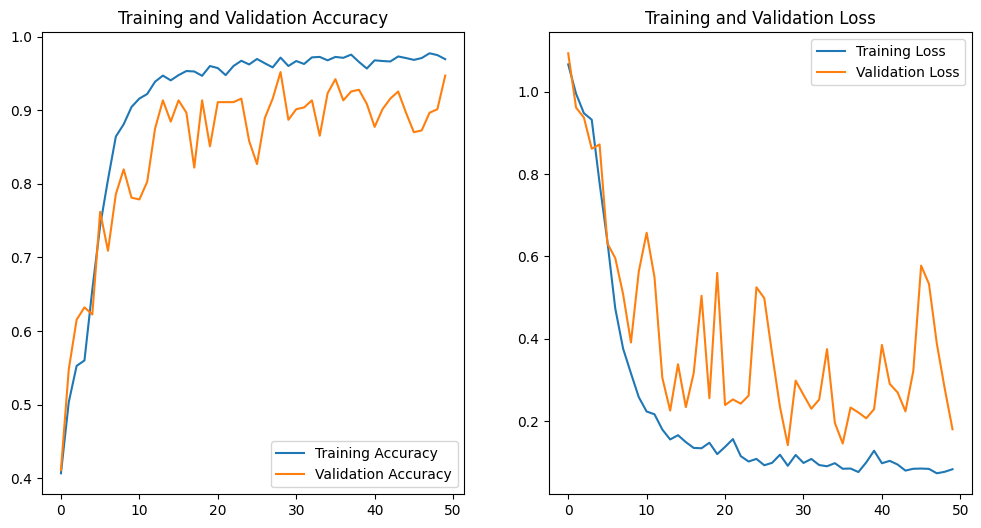

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**SAVING THE MODEL**

In [16]:
model.save('LDD_model.h5')

In [17]:
import os
model_path = 'LDD_model.h5'
if os.path.exists(model_path):
    print("Model is saved.")
else:
    print("Model is not saved.")

Model is saved.


**REAL-TIME ANALYSIS**

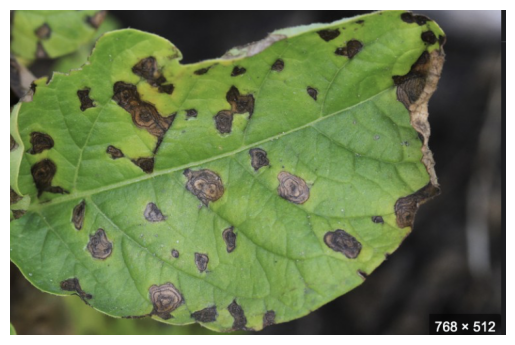

In [27]:
from PIL import Image
image = Image.open('img.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [22]:
# Loading the saved model
model = tf.keras.models.load_model('LDD_model.h5')

# Preprocess the input image
image = Image.open('img.png').convert('RGB')
image = image.resize((256, 256))
image = np.array(image) / 255.0

# Perform the prediction
class_name = ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy']
input_data = np.expand_dims(image, axis=0)
predictions = model.predict(input_data)

# Get the predicted class label
predicted_class = class_name[np.argmax(predictions)]

print('Predicted class:', predicted_class)



1/1 [==============================] - 0s 112ms/step
Predicted class: Potato__Early_blight
